<font size="5">Landform Evolution based on Mass Conservation: Fluvial Erosion Modules

Notebook Walkthrough Video: https://www.youtube.com/watch?v=UMJke7uZGPQ

<font size="4">Introduction

The Willgoose (2004) paper explores the mathematical modeling of landform evolution. There are many issues needed to be discussed such as, the fundamental nature of mass conservation and the role of detachment and transport limited processes in mass conservation equations which is primarily what our model focuses on. Other models consider other issues such as the interaction between detachment and transport-limitation in channels, the role of hillslope erosion and soil properties and their interaction with channel processes, the interactions with tectonics when applying these models at a large scale, depositional structures and implications for paleo-climatic interpretation, engineering applications of these models, and numerical issues in the computer implementations. The journal emphasizes that this review is not intended for comparative purposes, but rather reviewing the discussions that surround each of these models. 

For the purposes of this report, we focused on a specific fluvial erosion module that uses an "explicit transport capacity model with mass balance for overland and river flow" (Willgoose 2004). The equation being used considers how the potential transport rate may vary with the grading of the material eroded and deposited. So, sediment transport is a function of hydraulic conditions. If the potential sediment transport entering a node is greater than that exiting then deposition occurs, and if it is less than then erosion occurs.  

<font size="4">Equations

The equation we started with is the fluvial erosion module derived from the mass balance equation:
    
$$∂z/∂t=U+Σ∇⋅Q_(s_i )$$

Where z is elevation and, in this case, physically represents the thickness of sediment, U is the rate of tectonic uplift, and is assumed to be a constant, and $∇⋅Q_(s_i )$ is the divergence of sediment flow. 

If $∇⋅Q_(s_i )>0$, then $∇⋅Q_(s_i )$=deposition rate

If $∇⋅Q_(s_i )<0$, then $∇⋅Q_(s_i )$=erosion rate

    
This equation can be manipulated to be modeled as an advection process. First, $∇⋅Q_(s_i )$ is expanded into its vector components, and since this model is focused on the transport of sediment in the x-direction, only the zonal component is kept. This results in the following equation:
    
$$∂z/∂t=U+(∂Q_(s_i ))/∂x$$
    
The process now has a time and space component. However, a further substitution needs to be made so that the equation only has one unknown and can be discretized. This is done by assuming that $Q_(s_i )∝∂z/∂t$ , so $Q_(s_i )=uz$ where u represents the velocity of water in a stream. What this means physically is that some mechanism, in this case water, is advecting/transporting sediment thickness. By substituting this assumption in for $Q_(s_i )$, we get a final form of the model as:
    
$$∂z/∂t-∂z/∂x u=U$$
    
where the advection of sediment over some zonal distance with time is equal to the rate of tectonic uplift.

We also need to set our boundary conditions, which in this case is a Neumann boundary where there are set derivatives of $z$ at different points. Since this process does not have a set boundary equation, we assume that at $t=0$ and $x=0$, the initial boundary condition is equal to the marching equation for the upwind scheme, without factoring in the previous space step, plus the rate of tectonic uplift $(U)$. This is because the upwind scheme utilizes information from the previous space step and the next space step, but at $x=0$ and $t=0$, there is no information from the previous timestep to use. Thus, $z(x=0,t=0)=U$. This works for the given equation because the sediment transport is equivalent to the rate of tectonic uplift when no time has elapsed, and the process has not moved spatially. 
    
As for initial conditions, this process is modeled on a spatial scale of 1500 meters, so $0≤x≤1500 m$. It is observed on a time scale of one month, so 30 lines will be produced (one per day for a month). Additionally, the Courant number is factored in. This is explained in depth in the “Numerical Methods” section. 
    
$u=1$ m/s as the velocity of a stream can average anywhere from 0-3 m/s
    
$U=0.0001$ m/yr as the rate of tectonic uplift is a meniscal and slow process, especially when observed over a year
    
The advection-diffusion process is modeled in a very similar way, but with a slight modification to the equation. By factoring in a small-scale turbulence, which in this case is due to the flow of water, we introduce a diffusivity constant that will counterbalance the sediment process over time. The new equation is as follows:

$$∂z/∂t+∂z/∂x u=U+D (∂^2 z)/(∂x)^2  $$
    
where D is the diffusivity constant and is equal to $1.74×10^-4$ m^2/s . This value was obtained through a comprehensive review of other sources. The initial conditions and boundary conditions remain the same as the advection case.

<font size="4">Numerical Methods

This process was simulated using two different processes: advection and advection-diffusion. The advection equation describes how something is being transported by a background flow. For this reason, we chose to solve this equation using the Forward Euler upwind scheme. This assumes that $u$ (velocity) is constant and the thing that is being advected is being carried from upwind to downwind in the direction of $u$ (since $u>0$). So, in this scheme, there should only be one unknown, which in this case is $∂z/∂t$. This scheme utilizes information from the previous space step as well as the next space step and is therefore conditionally stable. This means that the method is stable for some values of dt. The stability is ensured based on the value of the Courant number, which is a dimensionless value that represents the time that a particle remains in one grid space. When $C>1$, the method is unstable and if $C<1$, the method is diffusive. The method is stable and non-diffusive when $C=1$.

The second simulation was the advection-diffusion process which breaks up the equation in two terms, the advection term, and the diffusion term. The advection term was simulated using the same method as the advection-only case (upwind scheme). This created two discretization’s where time was solved using the Forward Euler method, and the advection and diffusion terms were solved using the Center Forward Euler method or Midpoint method. Forward Euler was chosen for time because it is easy to implement and a function of known quantities. Since the initial conditions are known, we can take time steps through the duration of time that is being solved for and determine $∂z/∂t$.  In this case, we are solving for sediment thickness over a year. Given that our time steps are not significantly large, the inaccuracies that come with FE are not as concerning. The CFE method takes half of a time step forward in time to guess which way the wind is moving between the current and future time step. 

<font size="4">Results

Given that $Qs_i$ is described as a flux parameter, the equation best represents an advection process. Thus, an advection simulation was the best option to run with this model. Given the information from the journal, if the $∇⋅Q_(s_i )$ aspect of the equation results in a positive value, it will represent a deposition rate, whereas a negative result will represent an erosion rate. Given our plots, sediment transport starts at 0 because the rate only increases with respect to time and space. The slope of each line plotted represents tectonic uplift due to sediment transport over time and space by advection. We also projected different examples using different Courant values to represent different situations.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
import math as math

We solve the advection equation by using the upwind scheme and assigning the correct initial parameters and boundary conditions

In [7]:
dx=1500 #2 km -> m 
xf=2000000

C=[0.1,1.1]
tf = 2.592e6 #final time (30 days converted to seconds)

def adv (C, tf, xf, dx): 
    x=np.linspace(0, xf, dx)
    n=len(x)
    u=1 #m/s (velocity of flowing water)
    dt=(dx * C)/u #1=u=velocity=1 m/s
    t=np.arange(0, tf+dt, dt)
    
    #pre-allocate J-matrix:
    J=np.zeros((n, len(t)))

    #neumann boundary condition
    u=1
    U=0.0001 #m/yr
    for i in range(0, len(t)-1): 
        J[0,i+1] = J[0,0]
        for k in range(1, len(x)):
            J[:,0]= (J[k, i]-C*J[k, i])+U
    
    for i in range(0, len(t)-1): 
        J[0,i+1]=J[0,0]
        for j in range(1, len(x)): 
            if j==1: 
                J[j, i+1]=J[j, i]-C*J[j, i]
            else: 
                J[j, i+1]=J[j, i]-C*(J[j, i]-J[j-1, i])   
    return (J, dt)

Text(0.5, 1.0, 'Figure 1: Tectonic Uplift when C=0.1')

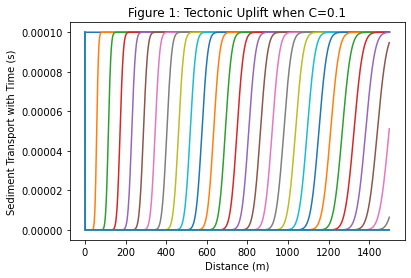

In [8]:
#call function:
J1, J1t = adv (C[0], tf, xf, dx)

#plot for C=0.1:
plt.figure()
plt.plot(J1[:, ::int(86400/J1t)])
plt.xlabel('Distance (m)')
plt.ylabel('Sediment Transport with Time (s)')
plt.title('Figure 1: Tectonic Uplift when C=0.1')

When C<1 the method is diffusive. Figure 1 shows sediment transport as positive so in these conditions, deposition is occurring so sediment transport entering a node is greater than that exiting. In this case, the slope increases until it reaches a point of plateau at about $0.0001$ m/yr which is equivalent to the rate of tectonic uplift. As the days progress, the slope shifts slightly to the right which shows how water is transporting the sediment over distance and time. The last few days are out of the range, but they show a similar pattern.  

Text(0.5, 1.0, 'Tectonic Uplift when C=1.1')

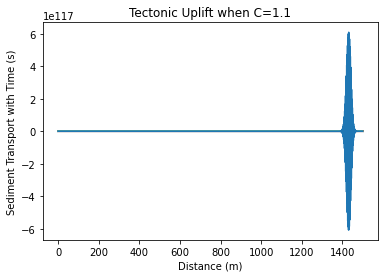

In [22]:
#call function:
J2, J2t=adv(C[1], tf, xf, dx)

#plot for C=1.1:
plt.figure()
plt.plot(J2[:, ::int(86400/J2t)])
plt.xlabel('Distance (m)')
plt.ylabel('Sediment Transport with Time (s)')
plt.title('Tectonic Uplift when C=1.1')

When $C>1$, the method fails as it is unstable. This can be seen in Figure 2 where sediment transport values stay constant at 0 until the end of the spatial scale where it begins to fluctuate between negative and positive values.

Aside from using different Courant values to assess method stability, this model is not incredibly sensitive to other grid spacings and time steps. If the grid space is smaller, the physical zonal distance that the process is modeled over decreases, which runs the risk of cutting off results as seen in Figure 1. The same reasoning applies to the time space, but regardless, the overall results remain the same for the advection process. 

Now lets look at the same process but in the form of an advection-diffusion process. We use the same initial parameters and boundary conditions as the advection-only case including the two different Courant values.

Text(0.5, 1.0, 'Figure 3: Tectonic Uplift when C=0.1')

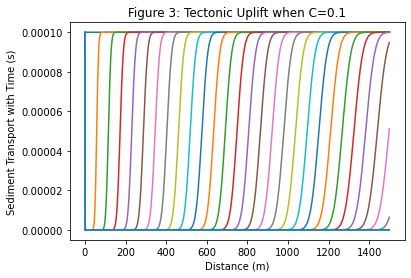

In [10]:
D=1.7e-4 #m^2/s
tf=2.592e6 #final time (30 days converted to seconds)

def diffusion(C, D, tf, xf, dx):
    x = np.linspace(0, xf, dx)
    n = len(x)
    u=1 #m/s
    dt=(dx*C)/u
    t=np.arange(0,tf+dt,dt)
    J=np.zeros((n,len(t)))
    Cd=(D*dt)/dx**2

    #neumann boundary condition
    U=0.0001 #m/day
    for i in range(0, len(t)-1): 
        J[0,i+1]=J[0,0]
        for k in range(1, len(x)):
            J[:,0]=(J[k, i]-C*J[k, i])+U
    
    for i in range(0, len(t)-1): 
        J[0,i+1] = J[0,0]
        for j in range(1, len(x)): 
            if j==1: 
                J[j, i+1] = J[j, i]-C*J[j, i]+Cd*(J[j+1, i]-2*J[j, i])
            elif j==len(x)-1:
                J[j, i+1]=J[j, i]-C*(J[j, i]-J[j-1,i])+Cd*(-2*J[j, i]+J[j-1, i])
            else: 
                J[j, i+1]=J[j, i]-C*(J[j, i]-J[j-1, i])+Cd*(J[j+1, i]-2*J[j, i]+J[j-1, i])  
    return (J, dt)

#call function:
J1, J1t=diffusion(C[0], D, tf, xf, dx)

#plot when C=0.1
plt.figure()
plt.plot(J1[:, ::int(86400/J1t)])
plt.xlabel('Distance (m)')
plt.ylabel('Sediment Transport with Time (s)')
plt.title('Figure 3: Tectonic Uplift when C=0.1')

Text(0.5, 1.0, 'Figure 4: Tectonic Uplift when C=1.1')

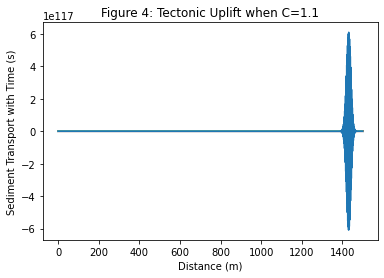

In [11]:
#call function:
J2, J2t=diffusion(C[1], D, tf, xf, dx)

#plot when C=1.1:
plt.figure()
plt.plot(J2[:, ::int(86400/J2t)])
plt.xlabel('Distance (m)')
plt.ylabel('Sediment Transport with Time (s)')
plt.title('Figure 4: Tectonic Uplift when C=1.1')

For the advection diffusion case, we can see that both simulations of Courant values look almost identical to the results of the advection-only case. This is because the diffusion coefficient is so small that it is insignificant. This makes sense physically since this is a small-scale turbulence and does not have a major impact on sediment thickness over time. Therefore, there is not much difference in the results. 

The paper included one graph that plotted area-slope data with a line of best fit based on general transport-limited processes:

<img src="Screenshot 2022-12-06 144225.png" width="500" height="1000">

Comparing our simulated advection graph to the one provided in the paper, the slopes produced in our simulation were much steeper. This implies that tectonic uplift due to deposition increases much faster with respect to space. The provided plot also includes a larger area than we used in our initial conditions; thus, the advection graph used in the simulation represents a more efficient process than the one provided. It’s also important to note that our simulated advection process plateaued at the value of our specific U variable, whereas the reported graph did not specify its U value. The Courant number was also not specified. 

The model helped illuminate the major concepts of advection and how the process transports material over time and space which is what the model in our simulation showcased. The model can be improved by using real measured values from actual river sources instead of theoretical values. Also, if the journal conducted some studies that could be compared to, it would make our results easier to analyze. 

<font size="4">Resources

Dolgopolova, E. (2019). Turbulent diffusion and eddy scales in Rivers. 
    Water Resources, 46(S1). https://doi.org/10.1134/s0097807819070042 

Tucker, G., Lancaster, S., Gasparini, N., & Bras, R. (2001). The     
    channel-hillslope integrated landscape development model (child). 
    Landscape Erosion and Evolution Modeling, 349–388.    
    https://doi.org/10.1007/978-1-4615-0575-4_12 

Willgoose, G. (2005). Mathematical modeling of whole landscape 
    evolution. Annual Review of Earth and Planetary Sciences, 
    33(1), 443–459. 
    https://doi.org/10.1146/annurev.earth.33.092203.122610 